# Project 3: Student Performance Prediction Model

# Introduction 
This project aims to develop a predictive model for student performance using various factors such as study time, extracurricular activities, and more. Understanding these influences can help educators and students make data-driven decisions to improve academic outcomes. Since student performance is often determined by continuous factors like study hours and sleep, linear regression is a suitable modeling approach. Linear regression is a statistical method used to model the relationship between one dependent variable and one or more independent variables by fitting a straight line through the data. This predicts outcomes by minimizing the difference between actual and predicted values using the least squares approach.

The dataset used for this project is sourced from Kaggle and contains multiple attributes related to student behavior and academic success. The model will be trained on historical data to identify patterns and make accurate grade predictions. By evaluating the model’s performance using appropriate metrics, we aim to determine the key contributors to student success and assess the effectiveness of linear regression for this task.

https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression


# Import

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data Cleaning & Preprocessing

In [17]:
# Pull Student Performance csv and display the first 5 rows
student_df = pd.read_csv("Student_Performance.csv")
student_df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [19]:
print("Missing Values:\n", student_df.isnull().sum())

Missing Values:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [21]:
# Remove rows with missing values
student_df.dropna(inplace=True)

# Convert categorical variables into numerical values and avoids dummy variable trap
student_df = pd.get_dummies(student_df, drop_first=True)

# Display dataset information after preprocessing with features
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Sleep Hours                       10000 non-null  int64  
 3   Sample Question Papers Practiced  10000 non-null  int64  
 4   Performance Index                 10000 non-null  float64
 5   Extracurricular Activities_Yes    10000 non-null  bool   
dtypes: bool(1), float64(1), int64(4)
memory usage: 400.5 KB


# Experiments

**Experiment 1**

In [33]:
# Define feature columns (X) and target variable (y)
X = student_df.drop(columns=["Performance Index"])  # Features
y = student_df["Performance Index"]  # Target variable (student performance score)

# Split in to training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shape of datasets
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (8000, 5) (8000,)
Testing set: (2000, 5) (2000,)


In [35]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [37]:
# Calculate mean squared error (MSE), r^2 (r-squared), & mean absolute error (MAE)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 4.08
R-squared (R²): 0.99
Mean Absolute Error (MAE): 1.61


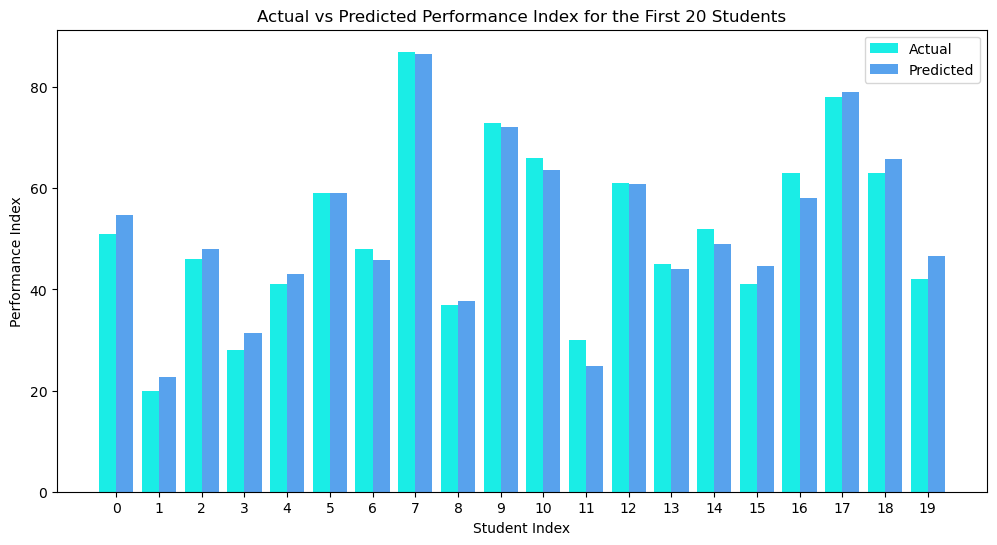

In [39]:
# First 20 for test sample
num_samples = 20
indices = np.arange(num_samples)

# Get actual and predicted values
actual_values = y_test[:num_samples].values
predicted_values = y_pred[:num_samples]

# Set up the plot
plt.figure(figsize=(12, 6))
bar_width = 0.4

# Plot bars for actual and predicted values
plt.bar(indices - bar_width/2, actual_values, bar_width, label="Actual", color="#1aede6")
plt.bar(indices + bar_width/2, predicted_values, bar_width, label="Predicted", color="#58a2ed")

# Labels and title
plt.xlabel("Student Index")
plt.ylabel("Performance Index")
plt.title("Actual vs Predicted Performance Index for the First 20 Students")
plt.xticks(indices)
plt.legend()

# Show the plot
plt.show()

**Evaluation**

In the first experiment, I used a linear regression model with all available features to predict student performance. The model achieved a high R² score of 0.99, indicating that it explains 99% of the variance in the performance index. The Mean Squared Error (MSE) was 4.08, and the Mean Absolute Error (MAE) was 1.61, showing strong prediction accuracy. I used a bar chart to compare the actual vs. predicted values for 20 students, confirming that the model's predictions are consistently close to the real scores. Overall, the model performed well and serves as a strong baseline for comparison with other experiments.

**Experiment 2**

In the next experiment, I will remove the feature "Sample Question Papers Practiced" to test whether this variable significantly affects the model’s accuracy. I hypothesized that some features may have weaker correlations with the target variable (Performance Index), so I wanted to test model performance without them.

In [61]:
# Define new features and target variable removing Sample Questions feature
X_exp2 = student_df.drop(columns=["Performance Index", "Sample Question Papers Practiced"])  
y_exp2 = student_df["Performance Index"]

# Split into training and testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_exp2, y_exp2, test_size=0.2, random_state=42)

# Display shape of datasets
print("Training set:", X_train2.shape, y_train2.shape)
print("Testing set:", X_test2.shape, y_test2.shape)

Training set: (8000, 4) (8000,)
Testing set: (2000, 4) (2000,)


In [59]:
# Train linear regression model on reduced feature set
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)

In [57]:
# Evaluate the model (Experiment 2)
mse2 = mean_squared_error(y_test2, y_pred2)
r2_2 = r2_score(y_test2, y_pred2)
mae2 = mean_absolute_error(y_test2, y_pred2)

print(f"Mean Squared Error (MSE): {mse2:.2f}")
print(f"R-squared (R²): {r2_2:.2f}")
print(f"Mean Absolute Error (MAE): {mae2:.2f}")

Mean Squared Error (MSE): 4.42
R-squared (R²): 0.99
Mean Absolute Error (MAE): 1.68


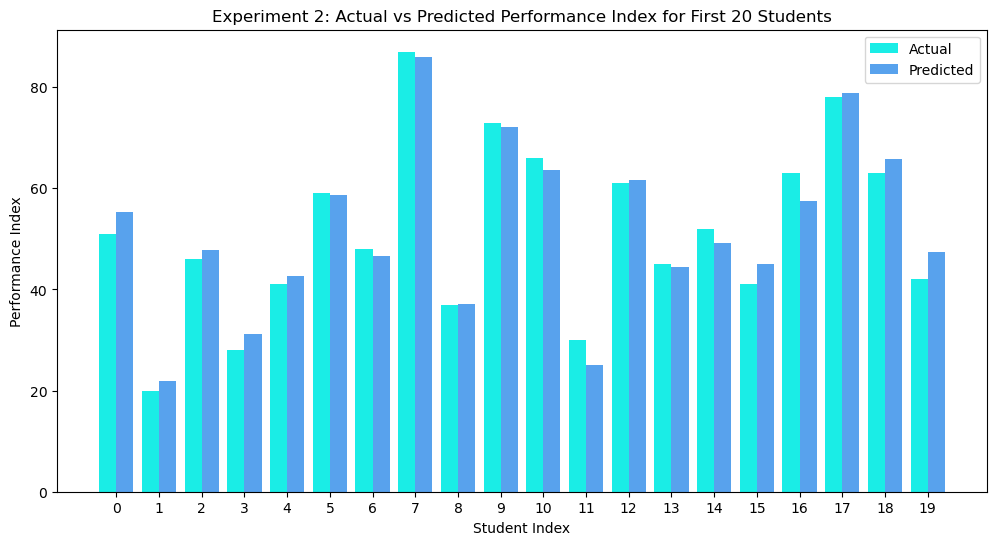

In [64]:
# Visualize actual vs predicted for Experiment 2 (first 20 students)
num_samples = 20
indices = np.arange(num_samples)

# Get the first 20 actual and predicted values
actual_values_2 = y_test2[:num_samples].values
predicted_values_2 = y_pred2[:num_samples]

# Set up the plot
plt.figure(figsize=(12, 6))
bar_width = 0.4

# Plot bars
plt.bar(indices - bar_width/2, actual_values_2, bar_width, label="Actual", color="#1aede6")
plt.bar(indices + bar_width/2, predicted_values_2, bar_width, label="Predicted", color="#58a2ed")

# Labels and title
plt.xlabel("Student Index")
plt.ylabel("Performance Index")
plt.title("Experiment 2: Actual vs Predicted Performance Index for First 20 Students")
plt.xticks(indices)
plt.legend()

# Show the plot
plt.show()


**Experiment 2 Evaluation**

In Experiment 1, the model used all available features and achieved an MSE of 4.08, R² of 0.99, and MAE of 1.61, showing excellent predictive performance. In Experiment 2, after removing the “Sample Question Papers Practiced” feature, the model still performed well but with a slightly higher MSE of 4.42 and MAE of 1.68. The R² remained the same at 0.99, indicating the overall variance explanation did not change. However, the small increase in error suggests that the dropped feature did contribute some predictive value. This comparison highlights that even seemingly minor features can help improve model accuracy.

**Experiment 3**

In this experiment, I replaced the Linear Regression model with a Decision Tree Regressor to explore whether a non-linear model could improve prediction accuracy. Decision trees can capture complex patterns in the data without assuming a linear relationship between features and the target variable.

In [68]:
# Train Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

X_exp3 = student_df.drop(columns=["Performance Index"])
y_exp3 = student_df["Performance Index"]

# Split the dataset
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_exp3, y_exp3, test_size=0.2, random_state=42)

# Display shape of datasets
print("Training set:", X_train3.shape, y_train3.shape)
print("Testing set:", X_test3.shape, y_test3.shape)

Training set: (8000, 5) (8000,)
Testing set: (2000, 5) (2000,)


In [70]:
model3 = DecisionTreeRegressor(random_state=42)
model3.fit(X_train3, y_train3)

# Predict using the model
y_pred3 = model3.predict(X_test3)

In [72]:
# Evaluate the model (Experiment 3)
mse3 = mean_squared_error(y_test3, y_pred3)
r2_3 = r2_score(y_test3, y_pred3)
mae3 = mean_absolute_error(y_test3, y_pred3)

print(f"Mean Squared Error (MSE): {mse3:.2f}")
print(f"R-squared (R²): {r2_3:.2f}")
print(f"Mean Absolute Error (MAE): {mae3:.2f}")

Mean Squared Error (MSE): 8.81
R-squared (R²): 0.98
Mean Absolute Error (MAE): 2.34


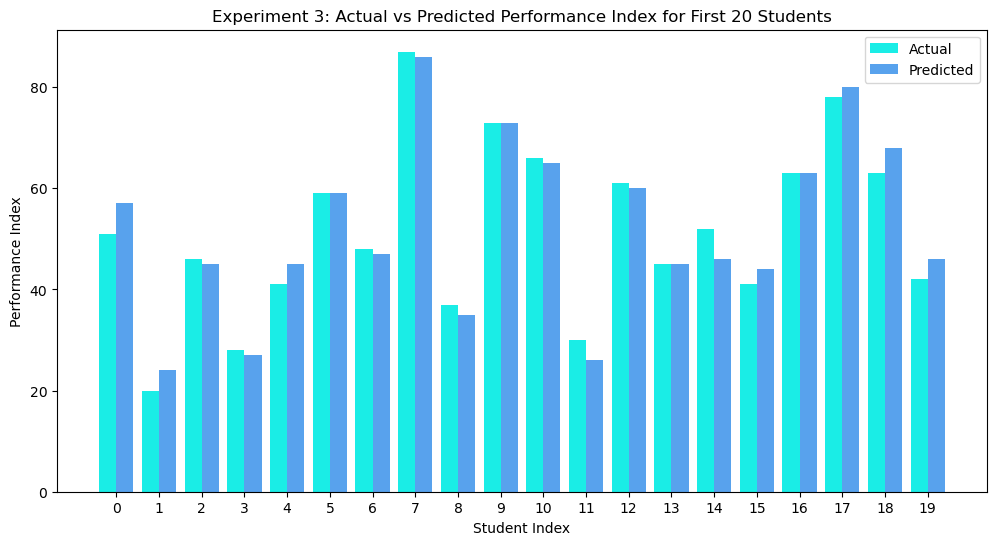

In [74]:
# Visualize actual vs predicted for Experiment 3 (first 20 students)
num_samples = 20
indices = np.arange(num_samples)

# Get the first 20 actual and predicted values
actual_values_3 = y_test3[:num_samples].values
predicted_values_3 = y_pred3[:num_samples]

# Set up the plot
plt.figure(figsize=(12, 6))
bar_width = 0.4

# Plot bars
plt.bar(indices - bar_width/2, actual_values_3, bar_width, label="Actual", color="#1aede6")
plt.bar(indices + bar_width/2, predicted_values_3, bar_width, label="Predicted", color="#58a2ed")

# Labels and title
plt.xlabel("Student Index")
plt.ylabel("Performance Index")
plt.title("Experiment 3: Actual vs Predicted Performance Index for First 20 Students")
plt.xticks(indices)
plt.legend()

# Show the plot
plt.show()


**Experiment 3 Evaluation**

In Experiment 3, the Decision Tree Regressor achieved an MSE of 8.81, R² of 0.98, and MAE of 2.34, which is  worse than the linear regression models in Experiments 1 and 2. Although the R² score remains high, the increased error values suggest that the decision tree overfits or lacks generalization on this dataset. Experiment 1 (all features) had the best performance with the lowest MAE (1.61) and MSE (4.08). Experiment 2, which removed one feature, still performed well with a slight increase in error. This comparison shows that for this dataset, linear regression is more effective and consistent than the non-linear decision tree model.

# Impact

This project has the potential to positively impact education by helping schools, teachers, and students identify key factors that influence academic success. By using predictive models to forecast student performance, educators could provide early interventions, allocate resources more effectively, and tailor support to individual needs. However, there are also important ethical considerations to acknowledge. Relying on predictive models could unintentionally reinforce biases if the data reflects existing inequalities—such as access to study materials or extracurricular opportunities. There's also a risk that students may be unfairly labeled or tracked based on predictions, which could affect motivation, confidence, and educational opportunities. It's essential that such models are used to support students and not to define or limit them. 

# Conclusion

I learned how different machine learning techniques and preprocessing choices can significantly influence a model’s performance. Starting with linear regression, I saw that using all features produced the most accurate results, with low error rates and high R² scores. In Experiment 2, removing a single feature (Sample Question Papers Practiced) led to a slight increase in error, suggesting that even small features can contribute to prediction accuracy. In Experiment 3, switching to Decision Tree Regressor (a non-linear model), resulted in higher error values, showing that linear regression was better suited for this dataset.